In [23]:

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)



# Where to save the figures
PROJECT_ROOT_DIR = "."
images = "images"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, images, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [121]:
import pandas as pd

DATA_PATH = os.path.join("datasets", "uber")
#fn that reads csv from the defined location, so if csv updates it can take care of it
def load_data(fname,data_path=DATA_PATH):
    csv_path = os.path.join(data_path,fname)
    return pd.read_csv(csv_path,encoding="UTF-8")

In [158]:
uber_aug=load_data('uber-raw-data-aug14.csv')
uber_sep=load_data('uber-raw-data-sep14.csv')


In [134]:
# 1. Draw the map background
def draw_map(lon,lat):
    fig = plt.figure(figsize=(8, 8))
    m = Basemap(projection='lcc', resolution='h', 
                lat_0=40.730610, lon_0=-73.935242,
                width=1E6, height=1.2E6)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')
    m.drawstates(color='gray')
    x, y = m(lon, lat)  # transform coordinates
    plt.scatter(x, y, 10, marker='o', color='Red', alpha=0.4) 

    plt.show()

In [135]:
# Extract the data we're interested in
def load_val(df):
    lat = df['Lat'].values
    lon = df['Lon'].values
    draw_map(lon,lat)


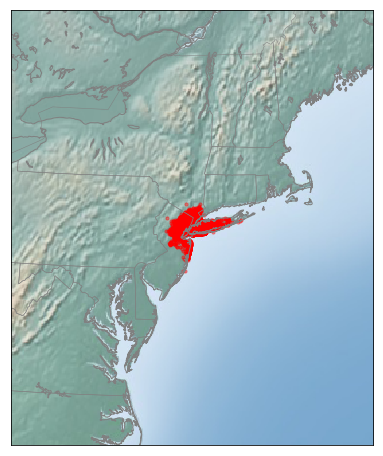

In [202]:
load_val(uber_aug)


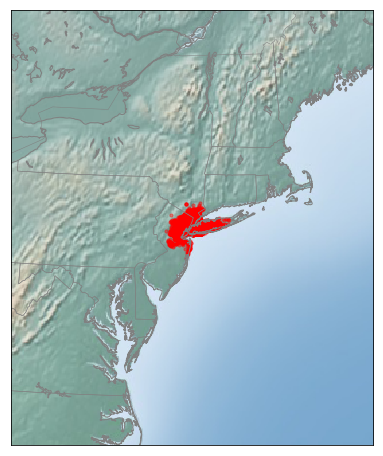

In [203]:
load_val(uber_sep)


In [151]:
def proper_time(df):
    df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
    df['DayOfWeekNum'] = df['Date/Time'].dt.dayofweek
    df['DayOfWeek'] = df['Date/Time'].dt.weekday_name
    df['MonthDayNum'] = df['Date/Time'].dt.day
    df['HourOfDay'] = df['Date/Time'].dt.hour
    return(df)

In [156]:
uber_aug=proper_time(uber_aug)
uber_sep=proper_time(uber_sep)

In [178]:
df=pd.DataFrame({'count' : uber_aug.groupby( 'Date/Time' ).size()})

In [187]:
df.index = pd.to_datetime(df.index)


Saving figure weekly_trips


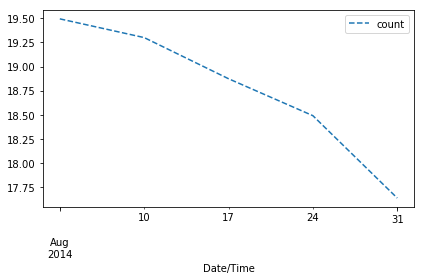

In [199]:
df.resample('W').mean().plot(style='--')
save_fig('weekly_trips')

Saving figure Business_day_trips


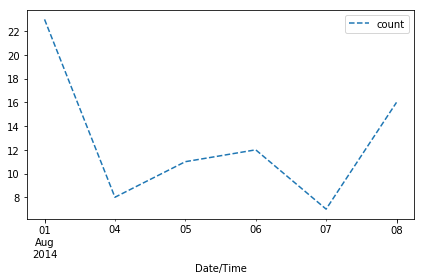

In [200]:
df.asfreq('B').plot(style='--')
save_fig('Business_day_trips')

In [205]:
df.asfreq('B')

,count
Date/Time,
2014-08-01,23
2014-08-04,8
2014-08-05,11
2014-08-06,12
2014-08-07,7
2014-08-08,16
